In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
train = pd.read_csv('./maldata/train/LargeTrain.csv')
train['Class'] = [ i - 1 for i in train['Class']]
target = 'Class'
predictors = [x for x in train.columns if x not in target]

/home/cnslabinner37/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/cnslabinner37/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
param_test1 = {'n_estimators':[50, 100, 150, 200, 250, 300]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=200,
                                                               min_samples_leaf=50, max_depth=9, max_features='sqrt',
                                                               subsample=0.8, random_state=10), 
                        param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5, verbose=3)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] ........................ n_estimators=50, score=0.993572 -  30.1s
[CV] n_estimators=50 .................................................
[CV] ........................ n_estimators=50, score=0.994485 -  29.9s
[CV] n_estimators=100 ................................................
[CV] ........................ n_estimators=50, score=0.993100 -  30.7s
[CV] n_estimators=100 ................................................
[CV] ........................ n_estimators=50, score=0.996774 -  30.7s
[CV] n_estimators=100 ................................................
[CV] ........................ n_estimators=50, score=0.994470 -  30.5s
[CV] n_estimators

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  6.5min finished


([mean: 0.99448, std: 0.00126, params: {'n_estimators': 50},
  mean: 0.99568, std: 0.00085, params: {'n_estimators': 100},
  mean: 0.99558, std: 0.00080, params: {'n_estimators': 150},
  mean: 0.99568, std: 0.00095, params: {'n_estimators': 200},
  mean: 0.99568, std: 0.00095, params: {'n_estimators': 250},
  mean: 0.99568, std: 0.00095, params: {'n_estimators': 300}],
 {'n_estimators': 200},
 0.9956755717183912)

In [4]:
param_test2 = {'max_depth':[5, 7, 9, 11], 'min_samples_split':[100, 600, 1100, 1600]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, max_features='sqrt',
                                                               subsample=0.8, random_state=10), 
                        param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5, verbose=3)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] min_samples_split=100, max_depth=5 ..............................
[CV] min_samples_split=100, max_depth=5 ..............................
[CV] min_samples_split=100, max_depth=5 ..............................
[CV] min_samples_split=100, max_depth=5 ..............................
[CV] ..... min_samples_split=100, max_depth=5, score=0.993113 - 1.2min
[CV] min_samples_split=100, max_depth=5 ..............................
[CV] ..... min_samples_split=100, max_depth=5, score=0.993566 - 1.2min
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] ..... min_samples_split=100, max_depth=5, score=0.993100 - 1.2min
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] ..... min_samples_split=100, max_depth=5, score=0.994470 - 1.2min
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] ..... min_samples_split=600, max_depth=5, score=0.989440 - 1.1min
[CV] min_samples

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  7.1min


[CV] ..... min_samples_split=600, max_depth=7, score=0.991276 - 1.4min
[CV] min_samples_split=600, max_depth=7 ..............................
[CV] ..... min_samples_split=600, max_depth=7, score=0.991728 - 1.4min
[CV] min_samples_split=600, max_depth=7 ..............................
[CV] ..... min_samples_split=600, max_depth=7, score=0.991720 - 1.4min
[CV] min_samples_split=1100, max_depth=7 .............................
[CV] ..... min_samples_split=100, max_depth=7, score=0.994009 - 1.8min
[CV] min_samples_split=1100, max_depth=7 .............................
[CV] .... min_samples_split=1100, max_depth=7, score=0.988981 - 1.3min
[CV] min_samples_split=1100, max_depth=7 .............................
[CV] ..... min_samples_split=600, max_depth=7, score=0.993088 - 1.4min
[CV] min_samples_split=1100, max_depth=7 .............................
[CV] ..... min_samples_split=600, max_depth=7, score=0.990783 - 1.4min
[CV] min_samples_split=1100, max_depth=7 .............................
[CV] .

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 32.3min finished


([mean: 0.99310, std: 0.00105, params: {'min_samples_split': 100, 'max_depth': 5},
  mean: 0.99015, std: 0.00138, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.98739, std: 0.00178, params: {'min_samples_split': 1100, 'max_depth': 5},
  mean: 0.98601, std: 0.00207, params: {'min_samples_split': 1600, 'max_depth': 5},
  mean: 0.99457, std: 0.00114, params: {'min_samples_split': 100, 'max_depth': 7},
  mean: 0.99172, std: 0.00077, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.98979, std: 0.00168, params: {'min_samples_split': 1100, 'max_depth': 7},
  mean: 0.98850, std: 0.00202, params: {'min_samples_split': 1600, 'max_depth': 7},
  mean: 0.99485, std: 0.00106, params: {'min_samples_split': 100, 'max_depth': 9},
  mean: 0.99218, std: 0.00087, params: {'min_samples_split': 600, 'max_depth': 9},
  mean: 0.99089, std: 0.00144, params: {'min_samples_split': 1100, 'max_depth': 9},
  mean: 0.99043, std: 0.00152, params: {'min_samples_split': 1600, 'max_depth': 9}

In [5]:
param_test3 = {'min_samples_split':[10, 40, 70, 100], 'min_samples_leaf':[10, 40, 70, 100]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,max_depth=9, max_features='sqrt',
                                                               subsample=0.8, random_state=10), 
                        param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5, verbose=3)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] min_samples_split=10, min_samples_leaf=10 .......................
[CV] min_samples_split=10, min_samples_leaf=10 .......................
[CV] min_samples_split=10, min_samples_leaf=10 .......................
[CV] min_samples_split=10, min_samples_leaf=10 .......................
[CV]  min_samples_split=10, min_samples_leaf=10, score=0.995409 - 2.6min
[CV] min_samples_split=10, min_samples_leaf=10 .......................
[CV]  min_samples_split=10, min_samples_leaf=10, score=0.994026 - 2.6min
[CV] min_samples_split=40, min_samples_leaf=10 .......................
[CV]  min_samples_split=10, min_samples_leaf=10, score=0.996774 - 2.7min
[CV] min_samples_split=40, min_samples_leaf=10 .......................
[CV]  min_samples_split=10, min_samples_leaf=10, score=0.993100 - 2.7min
[CV] min_samples_split=40, min_samples_leaf=10 .......................
[CV]  min_samples_split=40, min_samples_leaf=10, score=0.994031 - 2.4min
[CV] m

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 14.4min


[CV]  min_samples_split=10, min_samples_leaf=40, score=0.992166 - 2.3min
[CV] min_samples_split=40, min_samples_leaf=40 .......................
[CV]  min_samples_split=40, min_samples_leaf=40, score=0.992195 - 2.3min
[CV] min_samples_split=40, min_samples_leaf=40 .......................
[CV]  min_samples_split=40, min_samples_leaf=40, score=0.991728 - 2.3min
[CV] min_samples_split=70, min_samples_leaf=40 .......................
[CV]  min_samples_split=40, min_samples_leaf=40, score=0.988960 - 2.4min
[CV] min_samples_split=70, min_samples_leaf=40 .......................
[CV]  min_samples_split=40, min_samples_leaf=40, score=0.991705 - 2.3min
[CV] min_samples_split=70, min_samples_leaf=40 .......................
[CV]  min_samples_split=40, min_samples_leaf=40, score=0.992166 - 2.3min
[CV] min_samples_split=70, min_samples_leaf=40 .......................
[CV]  min_samples_split=70, min_samples_leaf=40, score=0.992195 - 2.3min
[CV] min_samples_split=70, min_samples_leaf=40 ................

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 44.6min finished


([mean: 0.99457, std: 0.00135, params: {'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: 0.99420, std: 0.00147, params: {'min_samples_split': 40, 'min_samples_leaf': 10},
  mean: 0.99393, std: 0.00128, params: {'min_samples_split': 70, 'min_samples_leaf': 10},
  mean: 0.99356, std: 0.00179, params: {'min_samples_split': 100, 'min_samples_leaf': 10},
  mean: 0.99135, std: 0.00121, params: {'min_samples_split': 10, 'min_samples_leaf': 40},
  mean: 0.99135, std: 0.00121, params: {'min_samples_split': 40, 'min_samples_leaf': 40},
  mean: 0.99135, std: 0.00121, params: {'min_samples_split': 70, 'min_samples_leaf': 40},
  mean: 0.99107, std: 0.00132, params: {'min_samples_split': 100, 'min_samples_leaf': 40},
  mean: 0.98942, std: 0.00120, params: {'min_samples_split': 10, 'min_samples_leaf': 70},
  mean: 0.98942, std: 0.00120, params: {'min_samples_split': 40, 'min_samples_leaf': 70},
  mean: 0.98942, std: 0.00120, params: {'min_samples_split': 70, 'min_samples_leaf': 70},
  mean: 

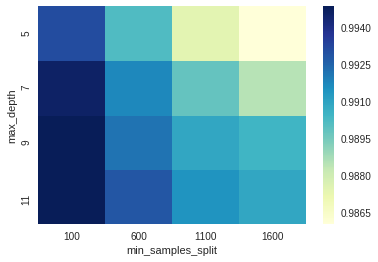

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
grid_visualization2 = []

for grid_pair in gsearch2.grid_scores_:
    grid_visualization2.append(grid_pair.mean_validation_score)
    
grid_visualization2 = np.array(grid_visualization2)
grid_visualization2.shape = (4, 4)
sb.heatmap(grid_visualization2, cmap='YlGnBu')
plt.xticks(np.arange(4) + 0.5, gsearch2.param_grid['min_samples_split'])
plt.yticks(np.arange(4) + 0.5, gsearch2.param_grid['max_depth'][::-1])
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')